In [1]:
import babet as bb
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from cmcrameri import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
date = [2023, 'Oct', 20]; # date of event
region = [65, 40, 20, -20]#[55, 45, 30, 3]
N = 25 # number of analogues to composite

# Past period 
past_Y1 = 1950 # time period to assess over (start) minimum 1950
past_Y2 = 1980 # time period to assess over (end) maximum 2023

# Present Period 
present_Y1 = 1992 # time period to assess over (start) minimum 1950
present_Y2 = 2022 # time period to assess over (end) maximum 2023

In [3]:

# psi_event = bb.Analogues.extract_region(bb.Analogues.extract_JJA(bb.Analogues.era5_mydata('psi250', range(2021,2023))), region)
# event = bb.Analogues.pull_out_day_era(psi_event, date[0], date[1], date[2])

# # Extract psi250
# psi_past = bb.Analogues.extract_region(bb.Analogues.extract_JJA(bb.Analogues.era5_mydata('psi250', range(past_Y1,past_Y2))), region)
# psi_present= bb.Analogues.extract_region(bb.Analogues.extract_JJA(bb.Analogues.era5_mydata('psi250', range(present_Y1,present_Y2))), region)

# # Find analogues
# dates_past = bb.Analogues.analogs_datelist(psi_past, event)[:30]
# dates_present = bb.Analogues.analogs_datelist(psi_present, event)[:30]

In [4]:
dates_past = ['19631106', '19621106', '19511112', '19761014', '19650926', '19771008', '19581001', '19731014', '19591130', '19791014', '19661105', '19601020', '19501121', '19521126', '19671102', '19611007', '19681102', '19641011', '19721120', '19571105', '19551019', '19740902', '19701119', '19711129', '19691114']
dates_past = pd.to_datetime([str(date) for date in dates_past], format='%Y%m%d')
dates_present = ['20201003', '19990920', '20191104', '19931002', '20001106', '20101109', '19950907', '20021115', '20041029', '20031031', '20081129', '20150916', '20181030', '20061020', '19971106', '20091022', '19961119', '20120925', '19921028', '20141115', '19941022', '20111104', '19981103', '20161121', '20051126']
dates_present = pd.to_datetime([str(date) for date in dates_present], format='%Y%m%d')

In [ ]:
# precip 
base_dir = "/network/group/aopp/met_data/MET001_ERA5/data/pr/day/pr_day_ERA5_0.5x0.5_*"
era5_all_pr_05 = xr.open_mfdataset(base_dir, combine='by_coords')

# mslp
base_dir = "/network/group/aopp/met_data/MET003_ERA5/data/psl/day/psl_day_ERA5_0.5x0.5_*"
era5_all_mslp_05 = xr.open_mfdataset(base_dir, combine='by_coords')

# 

In [6]:
# select dates in dates_past and dates_present
era5_pr = {}
era5_pr['pi'] = era5_all_pr_05.sel(time=dates_past, method='nearest')
era5_pr['curr'] = era5_all_pr_05.sel(time=dates_present, method='nearest')

# add event to era5_pr
era5_pr['babet'] = era5_all_pr_05.sel(time='2023-10-19', method='nearest')

In [7]:
# Plot settings

# UK
lat_max = 62
lat_min = 47
lon_min = -12
lon_max = 5

# #Europe
# lat_max = 70
# lat_min = 33
# lon_min = -27
# lon_max = 25

tp_min = 0 # Precipitation in mm
tp_max = 200

p_min = 970 # Pressure in hPa
p_max= 1030

euroatlantic = [lon_min-13, lon_max, lat_min-5, lat_max+6]
uk = [-11, 5, 48, 60]

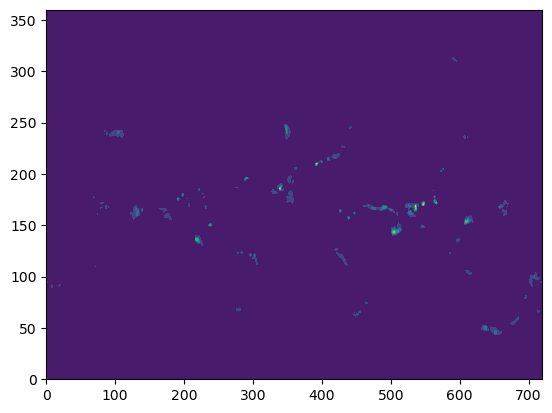

In [90]:
plt.contourf(tp_vals)

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


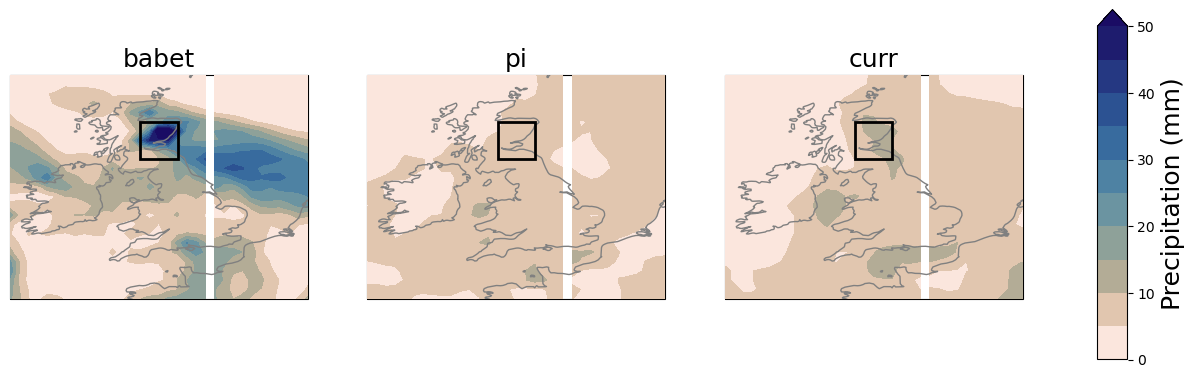

In [119]:
# figure and map setup
experiments = ['babet', 'pi', 'curr']
fs = 18
projection = ccrs.PlateCarree()

tp_min = 0
tp_max = 50

fig = plt.figure(1, figsize=(15, 5))

# EPS data ------------------    
latitude = era5_all_pr_05.latitude.values
longitude = era5_all_pr_05.longitude.values
# Fix longitude range to [-180, 180]
longitude_wrapped = (longitude + 180) % 360 - 180


for e, experiment in enumerate(experiments):

    # if experiment == 'pi':  # plot difference for counterfactual scenarios
    #     tp_vals = (era5_pr[experiment].mean(dim='time') - era5_pr['curr'].mean(dim='time')).pr.values
    # else: 
    tp_vals = era5_pr[experiment].mean(dim='time').pr.values*1000
    # tp_vals = np.concatenate([tp_vals[:, :360]], axis=1)

    ax = plt.subplot(1,3,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
    # ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

    # tp as shading
    # if experiment =='curr':
    clevs_tp = np.linspace(tp_min, tp_max, 11)  # 17
    cf = ax.contourf(longitude, latitude, tp_vals, clevs_tp, cmap=cm.lapaz_r,
                    transform=projection, zorder = 10, extend = 'max')
    # else: 
    #     clevs_tp = np.linspace(-15, 15, 10)
    #     cf_diff = ax.contourf(longitude, latitude, tp_vals, clevs_tp, cmap=cm.broc_r,
    #                             transform=projection, zorder = 10, extend = 'both')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Precipitation (mm)', fontsize = fs)

# Comparison of ERA5 and ERA5 Land

In [9]:
base_dir = "/network/group/aopp/met_data/MET005_ERA5-LAND/data/pr/1hr/UK/pr_1hr_ERA5-Land_0.1x0.1_*"
era5land_all_pr = xr.open_mfdataset(base_dir, combine='by_coords')

In [10]:
era5land_all_pr

<xarray.Dataset>
Dimensions:    (time: 640656, latitude: 101, longitude: 91)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01T01:00:00 ... 2023-02-01
  * latitude   (latitude) float32 60.0 59.9 59.8 59.7 ... 50.3 50.2 50.1 50.0
  * longitude  (longitude) float32 -7.0 -6.9 -6.8 -6.7 -6.6 ... 1.7 1.8 1.9 2.0
Data variables:
    pr         (time, latitude, longitude) float64 dask.array<chunksize=(743, 101, 91), meta=np.ndarray>
Attributes:
    Dataset:                     ERA5-Land
    Information:                 https://confluence.ecmwf.int/display/CKB/ERA5
    Local_AOPP_contact_address:  kristian.strommen@physics.ox.ac.uk
    Naming_Conventions:          CMIP6 names are used where it was possible t...
    Regional_Coverage:           UK
    grib_code:                   228
    history:                     2023-07-10 08:58:43 GMT by grib_to_netcdf-2....
    Conventions:                 CF-1.7

In [11]:
dates_past = ['19631106', '19621106', '19511112', '19761014', '19650926', '19771008', '19581001', '19731014', '19591130', '19791014', '19661105', '19601020', '19501121', '19521126', '19671102', '19611007', '19681102', '19641011', '19721120', '19571105', '19551019', '19740902', '19701119', '19711129', '19691114']
dates_present = ['20201003', '19990920', '20191104', '19931002', '20001106', '20101109', '19950907', '20021115', '20041029', '20031031', '20081129', '20150916', '20181030', '20061020', '19971106', '20091022', '19961119', '20120925', '19921028', '20141115', '19941022', '20111104', '19981103', '20161121', '20051126']

In [56]:
def hourly2daily(ds, dates):
    selected_days = {}
    for date in dates:
        # Parse the date to calculate the range from 1 am on the selected day to midnight the next day
        start_time = f"{date}T01:00:00"
        end_time = (pd.to_datetime(date) + pd.Timedelta(days=1)).strftime('%Y%m%dT00:00:00')
        
        # Select data within this range
        daily_data = ds.sel(time=slice(start_time, end_time))
        
        # Sum the precipitation over the selected time range
        selected_days[date] = daily_data.sum(dim='time')
    return selected_days

In [67]:
# Select all timesteps for the specified dates
era5land_pr = {}
era5land_pr['pi'] = xr.concat(hourly2daily(era5land_all_pr, dates_past).values(), dim='time')
era5land_pr['curr'] = xr.concat(hourly2daily(era5land_all_pr, dates_present).values(), dim='time')

# cannot add event because not in downloaded data

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


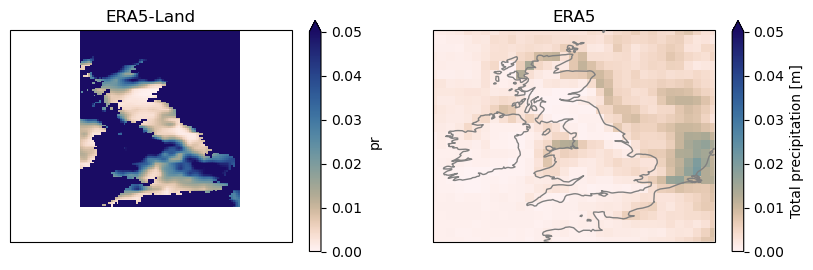

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'projection': ccrs.PlateCarree()})

test = era5land_all_pr.sel(time='2010-10-19').resample(time='1D').sum()
test.pr.plot(vmin=0, vmax=0.05, cmap=cm.lapaz_r, ax=ax[0])
ax[0].set_extent(uk, projection)
ax[0].set_title('ERA5-Land')

test2 = era5_all_pr_05.sel(time='2010-10-19')
test2.pr.plot(vmin=0, vmax=0.05, cmap=cm.lapaz_r, ax=ax[1])
ax[1].set_extent(uk, projection)
ax[1].set_title('ERA5')
ax[1].add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


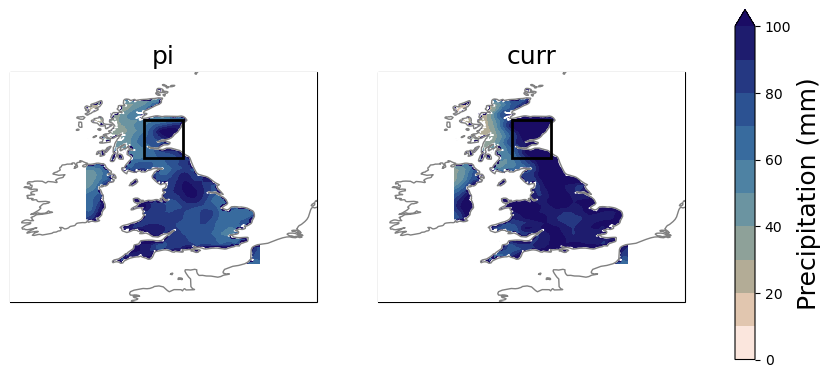

In [71]:
# figure and map setup
experiments = ['pi', 'curr']
fs = 18
projection = ccrs.PlateCarree()

tp_min = 0
tp_max = 100

fig = plt.figure(1, figsize=(10, 5))

# EPS data ------------------    
latitude = era5land_all_pr.latitude.values
longitude = era5land_all_pr.longitude.values

for e, experiment in enumerate(experiments):

    tp_vals = era5land_pr[experiment].pr.mean(dim='time').values*1000

    ax = plt.subplot(1,2,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
    ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

    # tp as shading
    # if experiment =='curr':
    clevs_tp = np.linspace(tp_min, tp_max, 11)  # 17
    cf = ax.contourf(longitude, latitude, tp_vals, clevs_tp, cmap=cm.lapaz_r,
                    transform=projection, zorder = 10, extend = 'max')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Precipitation (mm)', fontsize = fs)

# Irene precipitation in reforecasts

In [4]:
import xarray as xr
import cfgrib
import numpy as np
reforcast_dir = '/gf5/predict/AWH019_ERMIS_ATMICP/reforecast_date2024-08-15_date2011-08-15.grib'
test = xr.open_mfdataset(reforcast_dir).swap_dims({'step':'valid_time'})

Ignoring index file '/gf5/predict/AWH019_ERMIS_ATMICP/reforecast_date2024-08-15_date2011-08-15.grib.5b7b6.idx' older than GRIB file


In [30]:
# US boundaries 
lat_max = 50
lat_min = 35
lon_min = -80
lon_max = -66

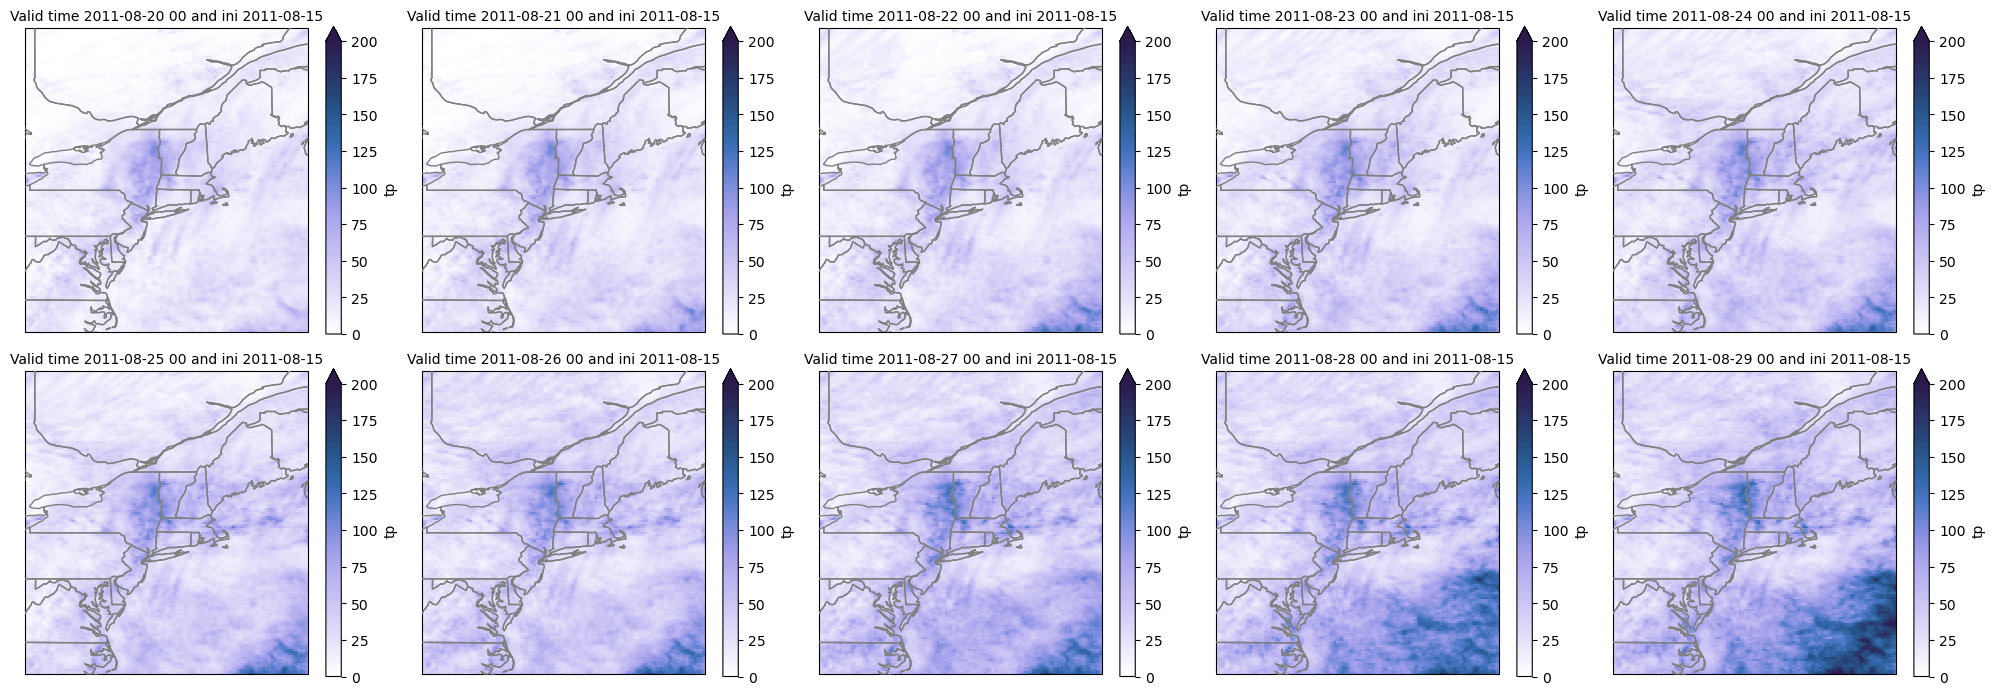

In [60]:
fig, ax = plt.subplots(2, 5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 7))
valid_times = ['2011-08-20 00','2011-08-21 00','2011-08-22 00','2011-08-23 00', '2011-08-24 00', '2011-08-25 00', '2011-08-26 00', '2011-08-27 00', '2011-08-28 00', '2011-08-29 00']
ini = test.valid_time.values[0]

# Convert 2D array `ax` to a flat array for easier 1D indexing
ax = ax.flatten()

for t in range(len(valid_times)):
    valid_time = valid_times[t]
    precip = test.tp.sel(valid_time=valid_time) * 1000 #- test.tp.sel(valid_time='2011-08-19 00') * 1000

    # Plotting
    precip.plot(ax=ax[t], transform=ccrs.PlateCarree(), vmin=0, vmax=200, cmap=cm.devon_r)
    
    # Add features to the plot
    ax[t].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', zorder=13)
    ax[t].add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', zorder=13)
    ax[t].set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Set title for each subplot
    ax[t].set_title(f'Valid time {valid_time} and ini {str(ini)[:10]}', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()